In [130]:
import pandas as pd
import numpy as np
import random
import math
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from math import sqrt

In [131]:
wine= datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
print(df)
print('labels : ',wine.target_names)
height=7
width=1

     alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0      14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1      13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2      13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3      14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4      13.24        2.59  2.87  ...  1.04                          2.93    735.0
..       ...         ...   ...  ...   ...                           ...      ...
173    13.71        5.65  2.45  ...  0.64                          1.74    740.0
174    13.40        3.91  2.48  ...  0.70                          1.56    750.0
175    13.27        4.28  2.26  ...  0.59                          1.56    835.0
176    13.17        2.59  2.37  ...  0.60                          1.62    840.0
177    14.13        4.10  2.74  ...  0.61                          1.60    560.0

[178 rows x 13 columns]
lab

In [132]:
data = df.to_numpy()
classes = wine.target

In [133]:
def cluster_SOM(x,map,h,w):
  pattern_arr=np.tile(x,(h,w,1))
  Eucli_MAP=np.linalg.norm(pattern_arr - map, axis=2)
  BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)
  return BMU

def SOM(X,map_height,map_width,no_features,learning_rate=0.1,total_epochs=6):
  MAP= np.random.uniform(size=(map_height,map_width,no_features))
  prev_MAP=np.zeros((map_height,map_width,no_features))

  convergence=[1]
  e_convergence=0.001
  flag=0

  for epoch in range(total_epochs):
    shuffle = np.random.randint(len(data), size=len(data))
    for k in range(len(data)):
      J=np.linalg.norm(MAP-prev_MAP)
      
      if J<=e_convergence:
        flag=1
        break
      else:
        pattern=data[shuffle[k]]
        BMU = cluster_SOM(pattern,MAP,map_height,map_width)
        prev_MAP = np.copy(MAP)

        for i in range(map_height):
          for j in range(map_width):
            distance = np.linalg.norm([i - BMU[0], j - BMU[1]])
            distance=np.exp(distance/2)
            MAP[i][j] += distance*learning_rate*(pattern-MAP[i][j])
    convergence.append(J)

    if(flag==1):
      break;
    
    return MAP

   
        

In [134]:
MAP_7x7 = SOM(data,height,width, 13)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


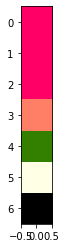

In [135]:
BMU = np.zeros([2],dtype=np.int32)
result_map = np.zeros([height,width,3],dtype=np.float32)
i=0
for pattern in data:
  BMU=cluster_SOM(pattern,MAP_7x7,height,width)
  x=BMU[0]
  y=BMU[1]

  if classes[i] == 0:
    if result_map[x][y][0] <= 0.5:
            result_map[x][y] += np.asarray([0.5,0,0.2])
  elif classes[i] == 1:
    if result_map[x][y][1] <= 0.5:
            result_map[x][y] += np.asarray([0.2,0.5,0])
  elif classes[i] == 2:
    if result_map[x][y][2] <= 0.5:
            result_map[x][y] += np.asarray([0,0.2,0.5])
  i+=1


result_map = np.flip(result_map,0)

plt.imshow(result_map, interpolation='nearest')
plt.show()

In [136]:
!pip install minisom

In [137]:
from sklearn import datasets
data = datasets.load_wine()
classes = data.target
df = pd.DataFrame(data.data, columns=data.feature_names)
data = df.to_numpy()

In [138]:
from minisom import MiniSom

som = MiniSom(height,width,13,sigma=0.9,learning_rate=0.9)
som.random_weights_init(data)

print("Training...")
som.train_random(data,500) 
print("\n...ready!")

Training...

...ready!


In [139]:
winner_coordinates = np.array([som.winner(x) for x in data]).T
cluster_index = np.ravel_multi_index(winner_coordinates, (height,width))

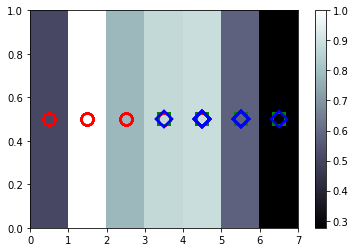

In [140]:
from pylab import plot,axis,show,pcolor,colorbar,bone
bone()
pcolor(som.distance_map().T)
colorbar()
t = classes
markers = ['o','s','D']
colors = ['r','g','b']
for cnt,xx in enumerate(data):
  w = som.winner(xx)
  plot(w[0]+.5,w[1]+.5,markers[t[cnt]],markerfacecolor='None',markeredgecolor=colors[t[cnt]],markersize=12,markeredgewidth=2)

show()
